# Anomaly Detection Project Final Notebook 
**by Heather McMillan, Lupe Luna, and Parker Voit**

July 22nd, 2021

<hr style="border-top: 10px groove #1277e1; margin-top: 1px; margin-bottom: 1px"></hr>


## Overview

### Before Running this Notebook
The curriculum access log data was acquired from the txt file provided. The cohort data from the SQL database and information provided by Mr Zach Gulde. The full cohort data needed to reproduce this notebook can be found [here](https://docs.google.com/spreadsheets/d/11g_qJf7VD989pvzOZIYkVZZc7xip4L5Cysifx_V6dIk/edit?usp=sharing) and needs to be downloaded as a csv to your working directory. Ensure you have both the txt file named `anonymized-curriculum-access-07-2021.txt` and the csv named `full_cohort_list.csv` in order for the acquire to go smoothly.

Nulls were filled in with 0s for the purpose of this exploration.  

## Findings

#### Which lesson appears to attract the most traffic consistently across cohorts (per program)?-
- For (Full Stack PHP) students - javascript-i 1144 views
- For (Java Program) students - javascript-i 19383 views
- For (Data Science) students - classification/overview 2469 page views
- LINK TO PART OF NOTEBOOK

#### Which lessons are least accessed?
The below endpoints have 34 page views each

1 (Full Stack PHP) • content/php_iv/classes-and-objects-ii • slides/object_oriented_programming

2 (Java) 
- 2.02.03_Power_Analysis
- 3-sql/6.4-limit 
- 8-clustering/5.1-kmeans-part-1 
- Univariate_Regression_Excel 


3 (Data Science)
- 13-advanced-topics/3.8-json-responses
- 2-storytelling/3.5-creating-dashboards
- advanced-topics/developing-data-products
- LINK TO PART OF NOTEBOOK

For questions or clarifications on these two questions contact Lupe Luna

-------- 

#### Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
**Data Science**

After filtering out endpoint with an image extension. The top accessed pages were in the fundamentals intro to data science lesson (in some form), classification overview, the regression overview, and the my SQL lesson. Knowing that the data science program has developed overtime, could account for why some cohorts viewed some pages more than others.

- Every cohort (minus Darden) has the fundamentals intro to data science pages in their top three views
    - The name is different for Bayes and Curie suggesting that perhaps sometime around there the endpoint of that intro page changed. This could account for Darden not accessing it as much
- Every cohort (minus Bayes) had My SQL overview page in their top 3 
    - With the amount of stress put on learning SQL (how important employers find it), students could be going back and referencing this more and more as time goes on
- Bayes and Curie viewed the regression overview lesson more so than all the other cohorts
- From Darden onward, the cohorts view count for the classification overview lesson was in the top 3 (minus Germain, who, when this data was pulled, had not reached this part yet)
    - This could be due to a curriculum shift. Depending on when the order was switched around. Maybe this is because cohorts are frequently referencing their first machine learning lesson 

**Web Dev**

Web Development students appear to be accessing the same several lessons over and over. Out of the top accessed lessons by web development cohorts, none had a significantly higher access to any other than the following 6 lessons. Ganymede had appendix in their top 6 most accessed pages. After further investigation, after the staff, they are the cohort that has accessed the appendix the most.

The top accessed lessons by web development (program id 2) cohorts are:
- Javascript i
- Java ii
- Java iii
- html-css
- jquery
- spring

Several of the cohorts also accessed this page frequently
- my_SQL

- LINK TO PART OF NOTEBOOK

For questions or clarifications on this question contact Heather McMillan

------

#### Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
- Most of the pings are either towards the end of the program, or immediately the day after.
- Some have a lot of pings at the beginning of the program start and stop once it hits two weeks.
- About a third only ping the day of the program start or after.
    - There are a few possible explanations for this.  Perhaps the user unenrolled, or they changed their github user status. What is interesting is that some users only pinged towards the end of the program, the others pinged for the first two weeks. My assumption is that it could be a staff member pinging the system or it's people that left after two weeks.
- Users 49,64, 278, 812, and 832 accessed the curriculum towards the end of the program.
- Users 487, 1060 and 1065 accessed the curriculum within two weeks of the start date.
- 889 and 1059 access the database over a week or two and then stops.

#### What topics are grads continuing to reference after graduation and into their jobs (for each program)?
- DS students ping the system the most after graduation. Mostly fundamentals looking at general info about pipeline. 
- The fifth through eleventh most pinged sites for graduates is web dev style looking at creating files and navigating the file system.
- Both groups are looking at lessons that are at the beginning of the lessons. 
- Graduates pinging early lessons makes sense, as they may need to review material from earlier on in the course.

For questions or clarifications on these two questions contact Parker Voit

In [1]:
# import modules
import pandas as pd
import numpy as np

# import vis tools
import matplotlib.pyplot as plt
import seaborn as sns

# import custom modules
import acquire as a
import prepare as p

import warnings
warnings.filterwarnings("ignore")

### Lupe's Section 
- here re type the questions you answered or type one here and the next one lower

### Which lesson appears to attract the most traffic consistently across cohorts (per program)

In [2]:
# acquire and prep
df = a.get_joined_curriculum_data()

In [3]:
pd.DataFrame(df).groupby('program_id')['endpoint'].value_counts()

program_id  endpoint                                   
0.0         /                                              4527
            search/search_index.json                       2018
            javascript-i                                    793
            toc                                             706
            spring                                          655
                                                           ... 
3.0         wrangle                                           1
4.0         content/html-css                                  2
            /                                                 1
            content/html-css/gitbook/images/favicon.ico       1
            content/html-css/introduction.html                1
Name: endpoint, Length: 4639, dtype: int64

In [4]:
program_list = [1, 2, 3, 4]
df_filtered = p.filter_endpoints(df)

In [5]:
for prog in program_list:
        
        program_df = pd.DataFrame(df_filtered).groupby('program_id')['endpoint'].value_counts()
        cep_df = program_df.loc[[prog]]
        cep_df = cep_df.nlargest(2)
        print(cep_df)
        print('\n')

program_id  endpoint    
1.0         javascript-i    1144
            index.html      1011
Name: endpoint, dtype: int64


program_id  endpoint    
2.0         javascript-i    19383
            java-iii        14155
Name: endpoint, dtype: int64


program_id  endpoint                          
3.0         classification/overview               2469
            fundamentals/intro-to-data-science    2164
Name: endpoint, dtype: int64


program_id  endpoint                                   
4.0         content/html-css                               2
            content/html-css/gitbook/images/favicon.ico    1
Name: endpoint, dtype: int64




#### Takeaways

The following were the top pages that attracted the most traffic consistenly per program 
 * 1 (Full Stack PHP) - javascript-i  1144 views
 * 2 (Java) - javascript-i 19383 views
 * 3 (Data Science) classification/overview 2469 views
 
Javascript-i had the most traffic for both Full Stack PHP and Java programs.  While the most accessed for Data Science was the classification overview.

### Which lessons are least accessed?

In [6]:
df.describe()

,user_id,cohort_id,program_id
count,1.018810e+06,1.018810e+06,1.018810e+06
mean,5.043983e+02,5.277355e+01,1.983391e+00
std,2.760938e+02,4.160344e+01,6.155352e-01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.020000e+02,2.600000e+01,2.000000e+00
50%,5.100000e+02,3.400000e+01,2.000000e+00
75%,7.210000e+02,5.900000e+01,2.000000e+00
max,1.082000e+03,1.660000e+02,4.000000e+00


In [7]:
# used 34 because it was 50% of usage for the cohort_id
for prog in program_list:
    program_df = pd.DataFrame(df_filtered).groupby('program_id')['endpoint'].value_counts()
    program_df = program_df[program_df >= 34]
    cep_df = program_df.loc[[prog]]
    cep_df = cep_df.nsmallest(5)
    print(cep_df)
    print('\n')

program_id  endpoint                                   
1.0         content/php_iv/classes-and-objects-ii          34
            slides/object_oriented_programming             34
            content/laravel/quickstart/controllers.html    35
            slides/arrays                                  35
            slides/inheritance_and_polymorphism            35
Name: endpoint, dtype: int64


program_id  endpoint                                        
2.0         2.02.03_Power_Analysis                              34
            3-sql/6.4-limit                                     34
            8-clustering/5.1-kmeans-part-1                      34
            Univariate_Regression_Excel                         34
            10-anomaly-detection/5-detecting-with-clustering    35
Name: endpoint, dtype: int64


program_id  endpoint                                       
3.0         13-advanced-topics/3.8-json-responses              34
            2-storytelling/3.5-creating-dashboards

#### Takeaways

 - Program 4 was not used in the responses for the top two questions since it was a test group.
 - Programs 1 and 2 did not have similar low accessed endpoints as they did for the most accessed endpoints.
 
The below endpoints have 34 page views each

1 (Full Stack PHP) 
* content/php_iv/classes-and-objects-ii
* slides/object_oriented_programming

2 (Java) • 2.02.03_Power_Analysis
 * 3-sql/6.4-limit
 * 8-clustering/5.1-kmeans-part-1
 * Univariate_Regression_Excel
 
3 (Data Science)
 * 13-advanced-topics/3.8-json-responses
 * 2-storytelling/3.5-creating-dashboards
 * advanced-topics/developing-data-products

### Lupe's Section Takeaways 

------
### Heather's Section

### Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [8]:
# acquire and prep
df = a.get_joined_curriculum_data()

#### Filtering Endpoints
When first going through the top endpoints were things like '/', 'toc' (table of contents), and search parameters. As well as image extensions (.jpg, .jpeg, .svg). The function below filters out those endpoints so as to only look at what appear to be actual curriculum lesson pages. 

In [9]:
# filter endpoints to keep only what appears to be curriculum pages
df = p.filter_endpoints(df)

#### Data Science 
- Get overview of top three accessed pages by cohort
- Visualize top 10 most accessed pages by cohort breakdown

In [10]:
# Filter for data science students 
ds_df = df[df.program_id == 3]

# create list of cohorts
ds_cohorts = list(ds_df.name.unique())
ds_cohorts

['Bayes', 'Curie', 'Darden', 'Easley', 'Florence', ' Germain ']

In [11]:
for cohort in ds_cohorts:
    cohort_df = pd.DataFrame(ds_df).groupby('name')['endpoint'].value_counts()
    cohort_df = cohort_df[cohort_df > 3]
    cep_df = cohort_df.loc[[cohort]]
    cep_df = cep_df.nlargest(3)
    print(cep_df)
    print('\n')

name   endpoint                                
Bayes  1-fundamentals/1.1-intro-to-data-science    643
       6-regression/1-overview                     521
       10-anomaly-detection/1-overview             384
Name: endpoint, dtype: int64


name   endpoint                                
Curie  6-regression/1-overview                     595
       1-fundamentals/1.1-intro-to-data-science    461
       3-sql/1-mysql-overview                      441
Name: endpoint, dtype: int64


name    endpoint                  
Darden  classification/overview       1137
        sql/mysql-overview             804
        anomaly-detection/overview     609
Name: endpoint, dtype: int64


name    endpoint                          
Easley  classification/overview               540
        fundamentals/intro-to-data-science    401
        sql/mysql-overview                    338
Name: endpoint, dtype: int64


name      endpoint                          
Florence  fundamentals/intro-to-data-science    

In [12]:
# create a list of the top 10 accessed pages by data science students
top_ds_lessons = list(ds_df.endpoint.value_counts().head(10).index)

# create a dataframe that only contains info about the top 10 accessed pages
top_endpoint_ds_df = ds_df[ds_df['endpoint'].isin(top_ds_lessons) == True]

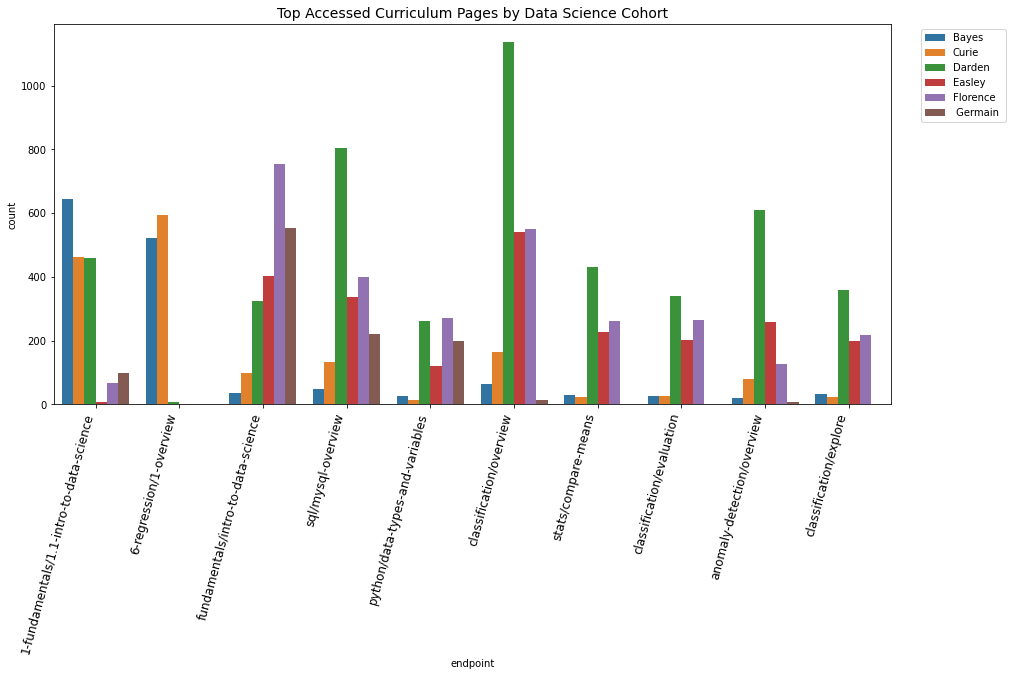

In [13]:
# use seaborn count plot to visualize top 10 most visited pages and a breakdown by cohort
plt.figure(figsize = (15,7))
sns.countplot(data = top_endpoint_ds_df, x = 'endpoint', hue = 'name')
plt.xticks(rotation = 75, fontsize = 12, ha = 'right')
plt.legend(bbox_to_anchor= (1.03, 1) )
plt.title('Top Accessed Curriculum Pages by Data Science Cohort', fontsize = 14)
plt.show()

In [14]:
# Web Dev Students 
web_df = df[df.program_id == 2]

# create list of web dev cohorts
web_cohorts = list(web_df.name.unique())
web_cohorts

['Teddy',
 'Sequoia',
 'Niagara',
 'Pinnacles',
 'Mammoth',
 'Ulysses',
 'Voyageurs',
 'Wrangell',
 'Xanadu',
 'Yosemite',
 'Staff',
 'Zion',
 'Andromeda',
 'Betelgeuse',
 'Ceres',
 'Deimos',
 'Europa',
 'Fortuna',
 'Apex',
 'Ganymede',
 'Hyperion',
 'Bash',
 'Jupiter',
 'Kalypso',
 'Luna',
 'Marco',
 'Neptune',
 'Oberon',
 ' Draco   ']

In [15]:
# loop through list of cohorts to get values of top 3 most accessed pages
for cohort in web_cohorts:
    cohort_df = pd.DataFrame(web_df).groupby('name')['endpoint'].value_counts()
    cohort_df = cohort_df[cohort_df > 3]
    cep_df = cohort_df.loc[[cohort]]
    cep_df = cep_df.nlargest(3) # can change this number to see a different top amount
    print(cep_df)
    print('\n')

name   endpoint
Teddy  spring      754
       java-iii    737
       mysql       641
Name: endpoint, dtype: int64


name     endpoint                 
Sequoia  spring                       364
         spring/fundamentals/views    207
         javascript-i                 202
Name: endpoint, dtype: int64


name     endpoint  
Niagara  spring        65
         index.html    63
         java-iii      29
Name: endpoint, dtype: int64


name       endpoint     
Pinnacles  javascript-i     69
           spring           61
           javascript-ii    58
Name: endpoint, dtype: int64


name     endpoint
Mammoth  java-i      19
         java-iii    13
         spring      12
Name: endpoint, dtype: int64


name     endpoint    
Ulysses  html-css        564
         javascript-i    529
         java-ii         425
Name: endpoint, dtype: int64


name       endpoint    
Voyageurs  javascript-i    889
           java-iii        772
           java-ii         758
Name: endpoint, dtype: int64


name 

**Note for Visualization** There were too many web development cohorts to visualize the top 10 accessed pages on on graph. I divided it up into cohorts by year

In [16]:
# set start date to date time 
web_df = p.make_datetime(web_df, 'start_date')

# set list of years 
# there were no program id 2 cohorts before 2016
years = [2016, 2017, 2018, 2019, 2020, 2021]

# initalize empty dictionary
students = {}

# fill dictionary with a list of cohorts for that year
for year in years:
    students[year] = list(web_df[web_df['start_date'].dt.year == year]\
         ['name'].value_counts().index)

In [17]:
# create list of top accessed endpoints
top_web_endpoints = list(web_df.endpoint.value_counts().head(10).index)

# create top endpoints dataframe using top 10 list
top_endpoints_web_df =  web_df[web_df['endpoint'].isin(top_web_endpoints) == True]

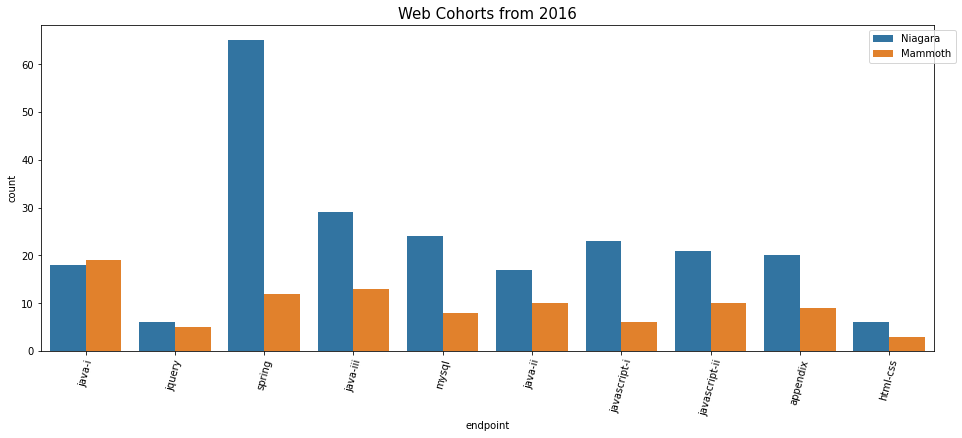

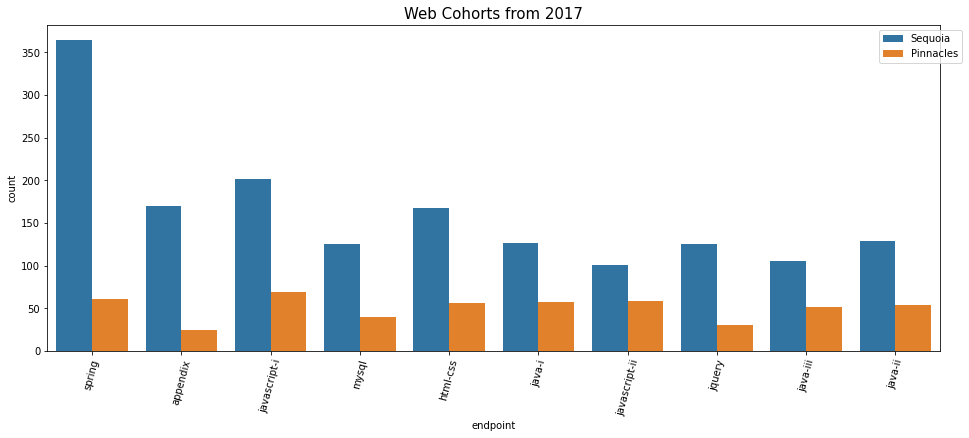

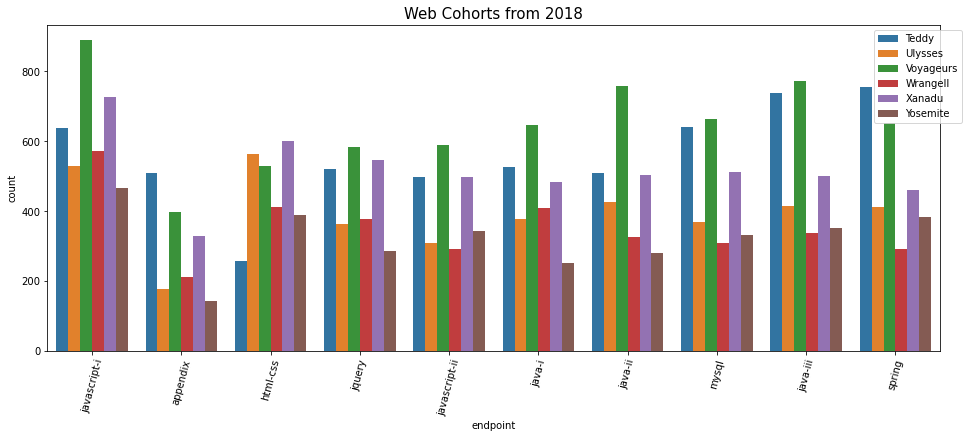

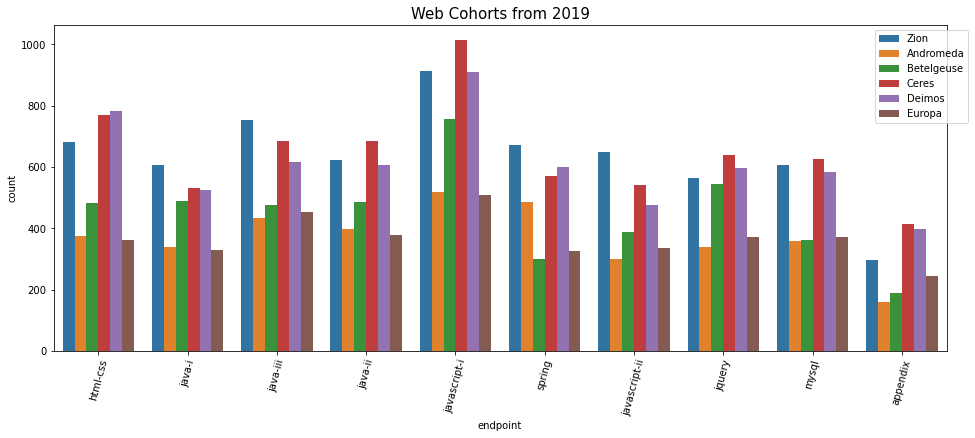

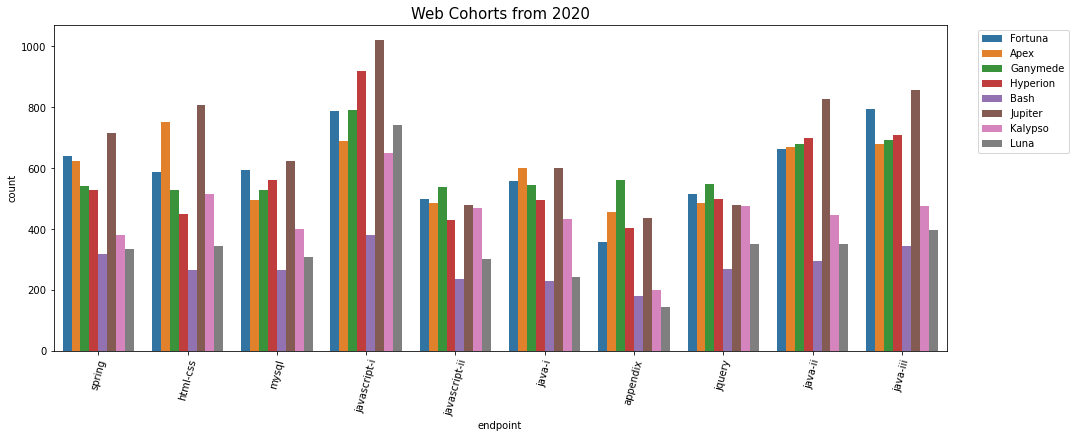

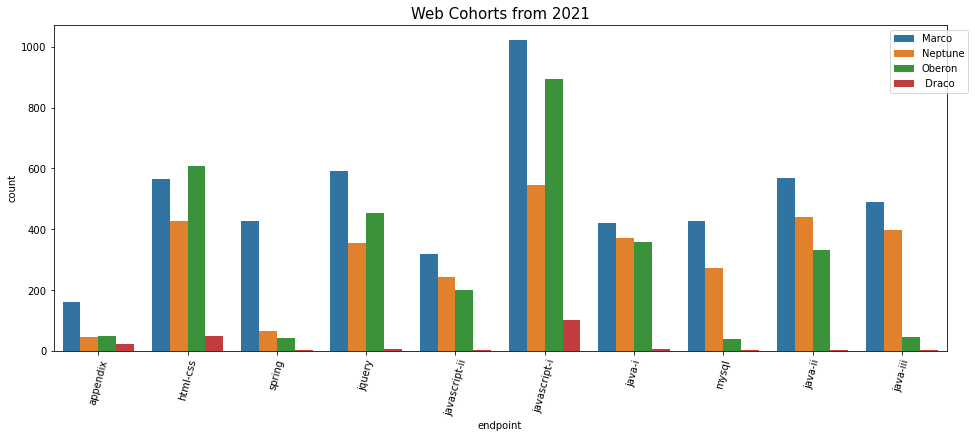

In [18]:
# use dictionary to loop through lists of cohorts by year to graph
for x in students:
    
    df_plot = top_endpoints_web_df[top_endpoints_web_df.name.isin(students[x])]
    
    plt.figure(figsize = (16,6))
    sns.countplot(data = df_plot, x = 'endpoint', hue = 'name')
    plt.xticks(rotation = 75)
    plt.legend(bbox_to_anchor= (1.03, 1) )
    plt.title(f'Web Cohorts from {x}', fontsize = 15)
    plt.show()

### Heather's Section Takeaways
As the curriculum for Data Science students is changing more as the program ages, the Data Science students at the beginning are accessing different pages. 

The web development program after going through several other iterations (program id 1, and 4), has perhaps stabilized. With more cohorts to look at there is less of a difference from cohort to cohort on what pages they view the most.

--------
### Parker's Section 
#### Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [19]:
# acquire and prep

In [20]:
# Save the dataframe as an original to access date column
df = a.get_joined_curriculum_data()
df_og = a.get_joined_curriculum_data()

In [21]:
# clean up dtypes and create a column for active status. Also add a ping variable to aggregate
df = p.make_active(df)
df.sample(10)

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id,is_active,pings
date,,,,,,,,,,
2018-10-26,search/search_index.json,269,26.0,97.105.19.58,Xanadu,2018-09-17,2019-02-08,2.0,True,1
2020-04-17,javascript-i/introduction/operators,638,57.0,70.114.0.52,Ganymede,2020-03-23,2020-08-20,2.0,True,1
2021-04-19,html-css/introduction,917,138.0,66.69.58.238,Neptune,2021-03-15,2021-09-03,2.0,True,1
2021-04-13,javascript-i,975,139.0,68.203.215.174,Oberon,2021-04-12,2021-10-01,2.0,True,1
2020-01-22,javascript-ii/promises,528,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0,True,1
2020-07-22,javascript-i/loops,602,56.0,47.187.240.67,Apex,2020-02-24,2020-07-29,2.0,True,1
2021-04-20,javascript-i/introduction/variables,979,139.0,107.77.219.39,Oberon,2021-04-12,2021-10-01,2.0,True,1
2021-07-13,mysql,920,138.0,67.11.98.144,Neptune,2021-03-15,2021-09-03,2.0,True,1
2020-11-10,java-iii/user-input,720,0.0,66.25.163.198,0,1970-01-01,1970-01-01,0.0,False,1


In [22]:
# create active students and inactive student dataframes to answer both questions
active_df = df[df.is_active == True]
inactive_df = df[df.is_active == False]

In [23]:
# Save counts of pings for analysis
active_ping = active_df.groupby(by = 'user_id').sum()

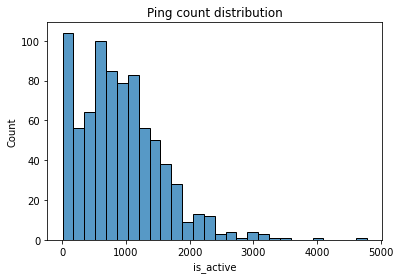

In [24]:
# check distribution to determine outlier identification method
sns.histplot(active_ping.is_active)
plt.title('Ping count distribution')
plt.show()

Due to the nature of the dataset, IQR and z-score outlier identification is not useful. I will instead do a simple percentile of 1% for outlier data points

In [25]:
# merge it all togetherm drop dupe columns, and rename to something useful.
df = df.merge(active_ping, how = 'left', on = 'user_id')\
     .drop(columns = ['cohort_id_y','program_id_y'])\
     .rename(columns = {'cohort_id_x':'cohort_id','program_id_x':'program_id',
                        'is_active_x':'is_active','is_active_y':'active_pings'})

In [34]:
# pull out the 1% low ping counts
one_percentile = df[df['active_pings'] <= df.active_pings.quantile(.01)]

In [27]:
# merge with original df for the date column and set it as index.
one_percentile = one_percentile.merge(df_og.date, how = 'left', left_index = True, right_index = True)
one_percentile = p.make_datetime(one_percentile, 'date', set_index = True)

In [28]:
# take the 1% pings that happened during the codeup course. The pings coming from people in the program.
lower_active_outliers = one_percentile[one_percentile['is_active'] == True]

In [29]:
# group and sum
low_ping_users = lower_active_outliers.groupby(by = 'user_id').sum()

In [30]:
# save a list of the outlier user ids
outlier_users = low_ping_users.index
# this for loop creates a dataframe for each low outlier user.
d = {}
for x in outlier_users:
    d[x] = lower_active_outliers[lower_active_outliers['user_id'] == x]

In [37]:
# using the user_id list, print out start dates and the program they are in. Since index is the date for each ping, we can just compare with the start date 
for x in outlier_users:
    print(f' User_id: {x}')
    print('-------------------')
    print(d[x][['program_id', 'start_date', 'user_id']])
    print('\n')

 User_id: 49
-------------------
            program_id start_date  user_id
date                                      
2018-01-26         2.0 2017-09-27       49
2018-01-26         2.0 2017-09-27       49
2018-01-26         2.0 2017-09-27       49
2018-01-26         2.0 2017-09-27       49
2018-01-26         2.0 2017-09-27       49
2018-01-26         2.0 2017-09-27       49
2018-01-26         2.0 2017-09-27       49
2018-01-26         2.0 2017-09-27       49
2018-01-26         2.0 2017-09-27       49
2018-01-29         2.0 2017-09-27       49
2018-01-29         2.0 2017-09-27       49
2018-01-29         2.0 2017-09-27       49
2018-01-29         2.0 2017-09-27       49
2018-01-29         2.0 2017-09-27       49
2018-02-01         2.0 2017-09-27       49
2018-02-01         2.0 2017-09-27       49
2018-02-01         2.0 2017-09-27       49
2018-02-01         2.0 2017-09-27       49
2018-02-01         2.0 2017-09-27       49
2018-02-01         2.0 2017-09-27       49
2018-02-01         2.

#### What lessons do alumni look at the most?

In [32]:
inactive_df.sample(10)

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id,is_active,pings
date,,,,,,,,,,
2020-06-06,3-sql/2-mysql-introduction,480,34.0,75.1.166.163,Bayes,2019-08-19,2020-01-30,3.0,False,1
2019-04-28,11.04_Modeling.md,368,0.0,173.173.113.51,0,1970-01-01,1970-01-01,0.0,False,1
2019-12-18,java-i,452,33.0,107.77.219.171,Ceres,2019-07-15,2019-12-11,2.0,False,1
2020-06-24,javascript-i/testing-user-functions,514,28.0,67.11.193.143,Staff,2014-02-04,2014-02-04,2.0,False,1
2020-09-12,html-css/css-i/introduction,714,0.0,70.123.200.67,0,1970-01-01,1970-01-01,0.0,False,1
2019-09-02,3-sql/5-basic-statements,404,28.0,24.243.70.180,Staff,2014-02-04,2014-02-04,2.0,False,1
2020-07-06,spring/extra-features/json-response,545,28.0,52.144.111.131,Staff,2014-02-04,2014-02-04,2.0,False,1
2018-12-11,jquery/essential-methods/traversing,312,28.0,24.243.35.7,Staff,2014-02-04,2014-02-04,2.0,False,1
2019-11-12,html-css,53,14.0,97.105.19.58,Lassen,2016-07-18,2016-11-10,1.0,False,1


In [38]:
# Take the sum of pings for each endpoint and sort to get the top pinged values 
pd.DataFrame(inactive_df.groupby(by = 'endpoint').sum()).head(20).sort_values(by = 'pings', ascending = False)

,user_id,cohort_id,program_id,is_active,pings
endpoint,,,,,
/,7761084,554775.0,34733.0,0,21936
1-fundamentals/1.1-intro-to-data-science,126671,17816.0,1335.0,0,633
1-fundamentals/1.2-data-science-pipeline,32897,3233.0,230.0,0,130
1-fundamentals/1.3-pipeline-demo,14428,1984.0,144.0,0,83
1-fundamentals/1-fundamentals-overview,14292,1574.0,114.0,0,80
06_moving_files,25913,196.0,14.0,0,78
05_creating_files_and_directories,24336,277.0,20.0,0,76
07_more_topics,24736,196.0,14.0,0,75
04_navigating_the_filesystem,16384,305.0,22.0,0,55


### Parker's Section Takeaways

#### Ping rates of active users takeaway
- Most of the pings are either towards the end of the program, or immediately the day after
- Some have a lot of pings at the beginning of the program start and stop once it hits two weeks
- about a third only ping the day of the program start or after

What does it mean? Who knows. Perhaps the user unenrolled, or they changed their github status. What is interesting is that some users only pinged towards the end of the program, the others pinged for the first two weeks. My assumption is that it could be a staff member pinging the system or it's people that left after two weeks

Users 49,64, 278, 812, and 832 accessed the curriculum towards the end of the program

Users 487, 1060 and 1065 accessed the curriculum within two weeks of the start date

889 and 1059 access the database over a week or two and then stops.

#### Alumni lesson access takeaways
- DS students ping the system the most after graduation. Mostly fundamentals looking at general info about pipeline. 
- The fifth through eleventh most pinged sites for graduates is web dev style looking at creating files and navigating the file system. 
- Both groups are looking at lessons that are at the beginning of the lessons. 
- Graduates pinging early lessons makes sense. Codeup programs range from 4-6 months, and the top accessed lessons are earlier lessons. Perhaps alumni needed to look up something that they learned very early on. 
- Both types of lessons accessed contain material that would be used quite frequently in a career.